# 1. 인공지능과 가위바위보 하기   

해야할 것: 
1. 이미지 분류 - 트레이닝 수행
2. 오버피팅 시도 - 데이터셋 다양성, 정규화 시도 
3. 분류 모델 accuracy 60% 이상 만들기 (다른 사람들 이미지 추가 진행 필요)


#### (1) 데이터 준비하기 

In [5]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.2.0


In [7]:
mnist=keras.datasets.mnist

MNIST 데이터 로드 

In [10]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [11]:
print(len(x_train))

60000


x train 배열 크기 출력 완료 

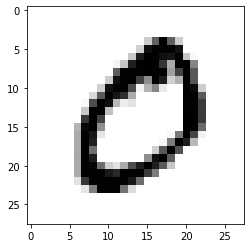

In [13]:
plt.imshow(x_train[1],cmap=plt.cm.binary)
plt.show()

이미지 출력해서 로드 됐는지 확인 완료 

In [15]:
print(x_train.shape)

(60000, 28, 28)


60,000장의 이미지가 28 x 28로 저장 돼있는 것을 확인 

In [16]:
print(x_test.shape)

(10000, 28, 28)


10,000장의 시험용 데이터 저장 된 것을 확인 

In [20]:
print('최소값:',np.min(x_train), ' 최대값:',np.max(x_train))

최소값: 0  최대값: 255


실제 픽셀값의 최소값 & 최대값 확인   
실제 픽셀값은 255로 확인 됨 

In [21]:
x_train_norm, x_test_norm = x_train / 255.0, x_test / 255.0
print('최소값:',np.min(x_train_norm), ' 최대값:',np.max(x_train_norm))

최소값: 0.0  최대값: 1.0


데이터들을 255로 나누어주어 최소값 0, 최대값 1만들어줌 

#### (2) 딥러닝 네트워크 설계하기 

In [23]:
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))

Model에 추가된 Layer 개수:  7


텐서플로우의 케라스 Sequential API 방법을 사용해 딥러닝 레이어 추가!

model.summary()

#### 딥러닝 네트워크 학습 시키기

In [31]:
print("Before Reshape - x_train_norm shape: {}".format(x_train_norm.shape))
print("Before Reshape - x_test_norm shape: {}".format(x_test_norm.shape))

x_train_reshaped=x_train_norm.reshape( -1, 28, 28, 1)  
x_test_reshaped=x_test_norm.reshape( -1, 28, 28, 1)

print("After Reshape - x_train_reshaped shape: {}".format(x_train_reshaped.shape))
print("After Reshape - x_test_reshaped shape: {}".format(x_test_reshaped.shape))

Before Reshape - x_train_norm shape: (60000, 28, 28)
Before Reshape - x_test_norm shape: (10000, 28, 28)
After Reshape - x_train_reshaped shape: (60000, 28, 28, 1)
After Reshape - x_test_reshaped shape: (10000, 28, 28, 1)


In [32]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_reshaped, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2050 - accuracy: 0.9362
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0663 - accuracy: 0.9799
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0477 - accuracy: 0.9853
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0372 - accuracy: 0.9881
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0296 - accuracy: 0.9907
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0246 - accuracy: 0.9922
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0211 - accuracy: 0.9934
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0167 - accuracy: 0.9947
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0150 - accuracy: 0.9949
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.012

epoch 10번으로 설정하고 학습 시작 

#### 테스트 데이터 성능 확인 

In [33]:
test_loss, test_accuracy = model.evaluate(x_test_reshaped,y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

313/313 - 0s - loss: 0.0311 - accuracy: 0.9908
test_loss: 0.031094707548618317 
test_accuracy: 0.9908000230789185


Accuracy 약 99% 나옴! 

In [34]:
predicted_result = model.predict(x_test_reshaped)  # model이 추론한 확률값. 
predicted_labels = np.argmax(predicted_result, axis=1)

idx=0  #1번째 x_test를 살펴보자. 
print('model.predict() 결과 : ', predicted_result[idx])
print('model이 추론한 가장 가능성이 높은 결과 : ', predicted_labels[idx])
print('실제 데이터의 라벨 : ', y_test[idx])

model.predict() 결과 :  [1.0302492e-10 4.6879935e-09 7.6317921e-09 1.3746670e-07 8.7280322e-11
 2.6849564e-12 2.5959384e-16 9.9999964e-01 2.2917461e-09 2.8156370e-07]
model이 추론한 가장 가능성이 높은 결과 :  7
실제 데이터의 라벨 :  7


7이 7일거라고 확신을 하는데 해당 부분에 대한 직접 확인해보기 

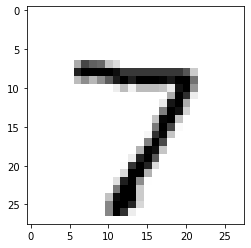

In [36]:
plt.imshow(x_test[idx],cmap=plt.cm.binary)
plt.show()

예측확률분포: [6.7817065e-04 9.1292947e-08 5.5357136e-06 9.3066028e-06 9.1317520e-02
 1.0395810e-05 1.1836166e-05 1.6121135e-07 2.5981124e-03 9.0536880e-01]
라벨: 4, 예측결과: 9


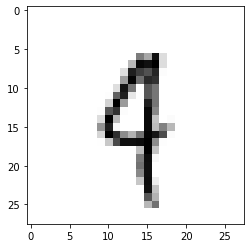

예측확률분포: [1.0469975e-09 2.0081350e-12 3.4809932e-13 9.7214025e-01 1.9850583e-11
 2.7858566e-02 1.2074301e-07 9.0618529e-18 3.5205591e-07 7.1269471e-07]
라벨: 5, 예측결과: 3


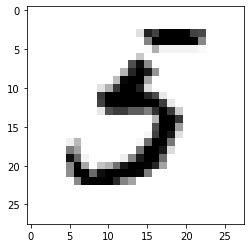

예측확률분포: [5.0527440e-11 2.5875194e-08 1.5464695e-03 1.7119888e-08 5.5513237e-07
 7.8010931e-10 5.0281519e-11 9.9845159e-01 1.2679336e-06 2.9451042e-11]
라벨: 2, 예측결과: 7


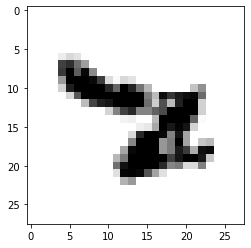

예측확률분포: [3.2712116e-12 1.0431263e-15 4.5243965e-08 6.2777515e-05 3.5715570e-06
 1.5592000e-06 4.3821299e-18 1.1586494e-06 1.3097236e-01 8.6895859e-01]
라벨: 8, 예측결과: 9


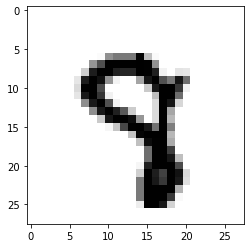

예측확률분포: [4.7967571e-08 2.7678226e-08 1.2007265e-11 9.9202734e-01 4.7405738e-12
 7.9696961e-03 2.0464012e-10 2.1936119e-08 2.9486680e-06 3.8167876e-08]
라벨: 5, 예측결과: 3


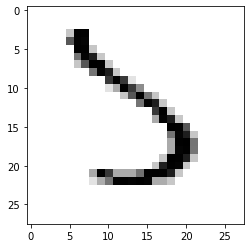

In [37]:
import random
wrong_predict_list=[]
for i, _ in enumerate(predicted_labels):
    # i번째 test_labels과 y_test이 다른 경우만 모아 봅시다. 
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)

samples = random.choices(population=wrong_predict_list, k=5)

for n in samples:
    print("예측확률분포: " + str(predicted_result[n]))
    print("라벨: " + str(y_test[n]) + ", 예측결과: " + str(predicted_labels[n]))
    plt.imshow(x_test[n], cmap=plt.cm.binary)
    plt.show()

Predict와 다르게 된 값들을 찾아서 어떠한 부분이 틀렸는지 확인하기. 

In [ ]:
#바꿔 볼 수 있는 하이퍼파라미터들
n_channel_1=16
n_channel_2=32
n_dense=35
n_train_epoch=15

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 훈련
model.fit(x_train_reshaped, y_train, epochs=n_train_epoch)

# 모델 시험
test_loss, test_accuracy = model.evaluate(x_test_reshaped, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))